In [ ]:
# !pip install fbprophet

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import dateutil.relativedelta as rd

In [8]:
# Display all the columns for the dataframes (not-truncated)
pd.set_option("display.max_columns", None)
# Format floats better
pd.options.display.float_format = '{:,.4f}'.format

In [18]:
covid_df = pd.read_csv("Resources/covid_data.csv")
covid_df

,Unnamed: 0,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,elderly_people_protection,government_response_index,stringency_index,containment_health_index,economic_support_index,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,population,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,26885,0094b645,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Saint Lucia,NaN,NaN,13.9094,-60.9789,"181,889.0000",LCA,LC,662.0000,XCD,NaN,NaN,NaN,LC,NaN,LCA
1,26886,0094b645,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Saint Lucia,NaN,NaN,13.9094,-60.9789,"181,889.0000",LCA,LC,662.0000,XCD,NaN,NaN,NaN,LC,NaN,LCA
2,26887,0094b645,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Saint Lucia,NaN,NaN,13.9094,-60.9789,"181,889.0000",LCA,LC,662.0000,XCD,NaN,NaN,NaN,LC,NaN,LCA
3,26888,0094b645,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Saint Lucia,NaN,NaN,13.9094,-60.9789,"181,889.0000",LCA,LC,662.0000,XCD,NaN,NaN,NaN,LC,NaN,LCA
4,26889,0094b645,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Saint Lucia,NaN,NaN,13.9094,-60.9789,"181,889.0000",LCA,LC,662.0000,XCD,NaN,NaN,NaN,LC,NaN,LCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162176,113401,fd169ad6,2022-01-07,"6,767.0000",67.0000,NaN,"90,009.0000","64,648.0000","26,229.0000","25,701.0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Liechtenstein,NaN,NaN,47.1400,9.5500,"37,910.0000",LIE,LI,438.0000,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
162177,113402,fd169ad6,2022-01-08,"6,823.0000",67.0000,NaN,"90,204.0000","64,796.0000","26,377.0000","25,702.0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Liechtenstein,NaN,NaN,47.1400,9.5500,"37,910.0000",LIE,LI,438.0000,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
162178,113403,fd169ad6,2022-01-09,"6,887.0000",67.0000,"6,163.0000","90,383.0000","64,796.0000","26,377.0000","25,702.0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Liechtenstein,NaN,NaN,47.1400,9.5500,"37,910.0000",LIE,LI,438.0000,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE
162179,113404,fd169ad6,2022-01-10,"6,915.0000",67.0000,"6,230.0000","90,433.0000","65,310.0000","26,385.0000","25,738.0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Liechtenstein,NaN,NaN,47.1400,9.5500,"37,910.0000",LIE,LI,438.0000,CHF,NaN,ChIJ_S9HHUQxm0cRibFa3Ta16mA,NaN,LI,NaN,LIE


In [19]:
covid_df = covid_df.groupby(["date"])[[
    "confirmed",
    "deaths", 
    "recovered",
    "tests",
    "vaccines", 
    "people_vaccinated",
    "people_fully_vaccinated",
    "hosp",
    "icu", 
    "vent",
    "school_closing", 
    "workplace_closing"
]].sum()
covid_df.index = pd.to_datetime(covid_df.index)
covid_df

,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,school_closing,workplace_closing
date,,,,,,,,,,,,
2020-01-01,0.0000,0.0000,0.0000,29.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-02,1.0000,0.0000,1.0000,150.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-03,0.0000,0.0000,0.0000,244.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-04,1.0000,0.0000,0.0000,366.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-01-05,1.0000,0.0000,0.0000,463.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,"292,479,631.0000","5,286,317.0000","50,055,849.0000","3,045,868,777.0000","7,259,162,583.0000","3,480,744,034.0000","3,013,097,777.0000","244,691.0000","40,687.0000","2,700.0000",43.0000,61.0000
2022-01-08,"294,552,466.0000","5,290,633.0000","50,192,912.0000","2,849,522,429.0000","7,473,747,216.0000","2,320,880,247.0000","1,866,975,858.0000","252,295.0000","41,139.0000","2,611.0000",39.0000,53.0000
2022-01-09,"295,945,398.0000","5,293,761.0000","50,286,547.0000","2,674,768,046.0000","7,769,900,363.0000","2,410,029,675.0000","2,010,571,139.0000","267,975.0000","41,941.0000","2,602.0000",35.0000,45.0000


<AxesSubplot:xlabel='date'>

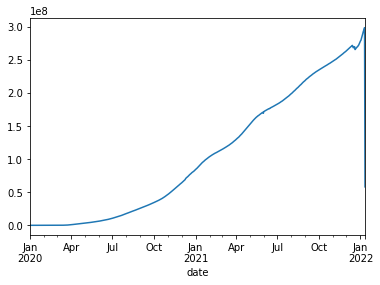

In [37]:
covid_df["confirmed"].plot()

<AxesSubplot:xlabel='date'>

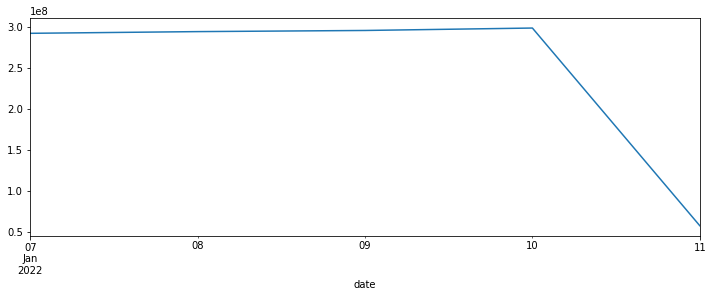

In [46]:
data_end_date = covid_df.index.max()
# check last week of data
covid_df["confirmed"][(data_end_date - rd.relativedelta(day=7)):].plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

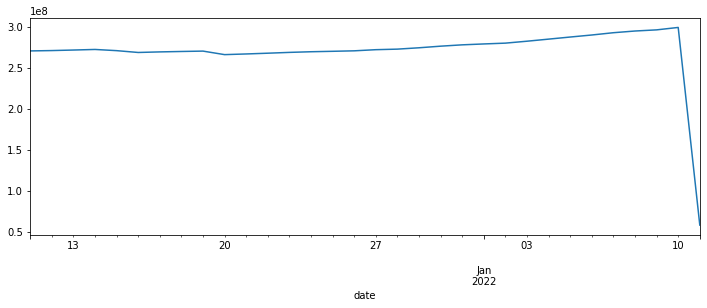

In [49]:
# check last month of data
covid_df["confirmed"][(data_end_date - rd.relativedelta(months=1)):].plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

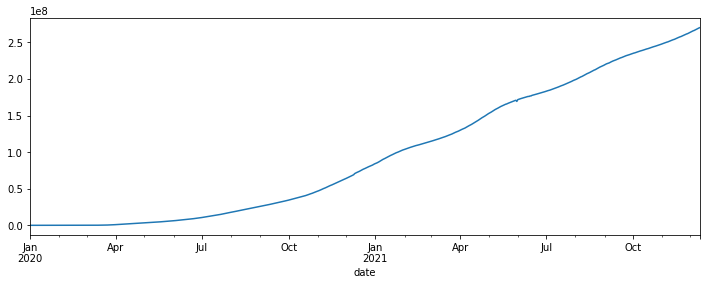

In [52]:
covid_df["confirmed"][:(data_end_date - rd.relativedelta(months=1))].plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

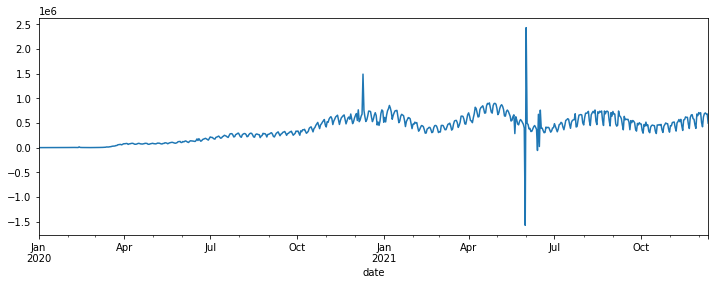

In [53]:
covid_df["confirmed"][:(data_end_date - rd.relativedelta(months=1))].diff().plot(figsize=(12,4))

In [58]:
predict_df = covid_df[["confirmed"]]
predict_df = predict_df[:(data_end_date - rd.relativedelta(months=1))]
predict_df = predict_df.diff()
predict_df = predict_df.dropna()
predict_df = predict_df.reset_index()
predict_df = predict_df.rename(columns={"confirmed":"y","date":"ds"})
predict_df

,ds,y
0,2020-01-02,1.0000
1,2020-01-03,-1.0000
2,2020-01-04,1.0000
3,2020-01-05,0.0000
4,2020-01-06,3.0000
...,...,...
705,2021-12-07,"688,157.0000"
706,2021-12-08,"703,408.0000"
707,2021-12-09,"681,309.0000"
708,2021-12-10,"682,295.0000"


In [59]:
from fbprophet import Prophet

def create_fbprohpet_predictions(df,periods,freq="D"):
    model = Prophet(interval_width=0.95,daily_seasonality=True)
    model_results = model.fit(df)
    future = model.make_future_dataframe(periods=periods,freq=freq)
    extrapolation = model.predict(future)
    return model, extrapolation

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
model, extrapolation = create_fbprohpet_predictions(df,periods=365)
extrapolation

In [ ]:
fig = model.plot(extrapolation, figsize=(16,9))

In [ ]:
fig = model.plot_components(extrapolation,figsize=(16,16))

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(
    model,
    initial="365 days",
    period="180 days",
    horizon="365 days"
)
df_cv

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric="rmse")